In [1]:
import pandas as pd
import numpy as np
import ast  # For safely evaluating string representations of lists

In [2]:
frequency_data = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/mous_words_syllable_bigram_frequencies.csv')
guslatho_subtlex = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/guslatho_MOUS_word_syllable_frequencies.csv', index_col=0)
frequency_data = frequency_data[['Word','Bigrams','Bigram Occurrence Counts','Zipf']]

In [3]:
frequency_data

,Word,Bigrams,Bigram Occurrence Counts,Zipf
0,toen,"['to', 'oe', 'en']","[2236591.0, 837795.0, 8542439.0]",6.032333
1,de,['de'],[2559661.0],7.381291
2,barkeeper,"['ba', 'ar', 'rk', 'ke', 'ee', 'ep', 'pe', 'er']","[584273.0, 1754491.0, 2174749.0, 3143026.0, 94...",3.622674
3,die,"['di', 'ie']","[1050254.0, 2076673.0]",6.853871
4,irritante,"['ir', 'rr', 'ri', 'it', 'ta', 'an', 'nt', 'te']","[2884214.0, 200692.0, 1787712.0, 333345.0, 892...",3.284921
...,...,...,...,...
1937,blije,"['bl', 'li', 'ij', 'je']","[152155.0, 3369152.0, 1639122.0, 913788.0]",3.485836
1938,jongeren,"['jo', 'on', 'ng', 'ge', 'er', 're', 'en']","[866375.0, 2451854.0, 2927082.0, 3692145.0, 67...",3.965097
1939,intens,"['in', 'nt', 'te', 'en', 'ns']","[2264626.0, 1477178.0, 3522714.0, 8542439.0, 6...",3.778748
1940,plezier,"['pl', 'le', 'ez', 'zi', 'ie', 'er']","[97171.0, 4397946.0, 100963.0, 123482.0, 20766...",5.093966


In [4]:
guslatho_subtlex

,Word,n_syllables,Log10_Syllable_FREQcounts,Syllable_Zipfs,Min_Log10_FreqCount,Min_Syll_Zipf
0,ik,1,"(6.241737438532683,)","(7.468668823067624,)",6.241737,7.468669
1,je,1,"(6.249430979053402,)","(7.476362363588343,)",6.249431,7.476362
2,het,1,"(6.032457179694622,)","(7.259388564229563,)",6.032457,7.259389
3,de,1,"(6.234172950952972,)","(7.461104335487914,)",6.234173,7.461104
4,dat,1,"(6.012697215956926,)","(7.239628600491868,)",6.012697,7.239629
...,...,...,...,...,...,...
278056,aagghh,1,"(0.3010299956639812,)","(1.5279613801989225,)",0.301030,1.527961
278057,aagezien,3,"(1.5185139398778875, 6.125745990776331, 5.0128...","(2.7454453244128287, 7.352677375311273, 6.2397...",1.518514,2.745445
278058,aaf,1,"(0.3010299956639812,)","(1.5279613801989225,)",0.301030,1.527961
278059,aada's,0,(),(),NaN,NaN


In [5]:
#show values of frequency_data where Bigram Occurrence Counts is an empty list
empty_bigram_occurrence_counts = frequency_data[frequency_data['Bigram Occurrence Counts'].apply(lambda x: ast.literal_eval(x) == [])]
empty_bigram_occurrence_counts

,Word,Bigrams,Bigram Occurrence Counts,Zipf
1012,u,[],[],6.736845


In [6]:
#drop row 1012 from frequency_data
frequency_data = frequency_data.drop(index=1012)

In [7]:
data_table = pd.merge(guslatho_subtlex,frequency_data,how='right', on='Word')
data_table.to_csv('correlation_data.csv')

In [8]:
# Ensure all elements in 'Log10_Syllable_FREQcounts' are lists
def ensure_list(x):
    if isinstance(x, float):  # If it's a float, wrap it in a list
        return [x]
    elif isinstance(x, str):  # If it's a string, safely evaluate it
        return ast.literal_eval(x)
    return x  # Otherwise, return as is

data_table['Log10_Syllable_FREQcounts'] = data_table['Log10_Syllable_FREQcounts'].apply(ensure_list)

# Print rows where 'Log10_Syllable_FREQcounts' is empty
empty_rows = data_table[data_table['Log10_Syllable_FREQcounts'].apply(lambda x: len(x) == 0)]
print("Rows with empty 'Log10_Syllable_FREQcounts':")
print(empty_rows)

# Compute max and mean values, handling empty lists
data_table['Max_Log10_Syllable_FREQcount'] = data_table['Log10_Syllable_FREQcounts'].apply(lambda x: max(x) if x else np.nan)
data_table['Mean_Log10_Syllable_FREQcount'] = data_table['Log10_Syllable_FREQcounts'].apply(lambda x: np.mean(x) if x else np.nan)

Rows with empty 'Log10_Syllable_FREQcounts':
           Word  n_syllables Log10_Syllable_FREQcounts Syllable_Zipfs  \
914   collega's          0.0                        ()             ()   
1294     auto's          0.0                        ()             ()   

      Min_Log10_FreqCount  Min_Syll_Zipf  \
914                   NaN            NaN   
1294                  NaN            NaN   

                                               Bigrams  \
914   ['co', 'ol', 'll', 'le', 'eg', 'ga', "a'", "'s"]   
1294                    ['au', 'ut', 'to', "o'", "'s"]   

                               Bigram Occurrence Counts      Zipf  
914   [488809.0, 2233880.0, 2754440.0, 4397946.0, 11...  4.296517  
1294              [611780.0, 137082.0, 2236591.0, 0, 0]  4.647758  


In [9]:
def to_float_list(x):
    if isinstance(x, str):  # Check if the value is a string
        x = ast.literal_eval(x)  # Safely evaluate the string to a Python object
    return [float(i) for i in x]


In [10]:
# data_table['Log10_Min_Syll_Freq'] = data_table['Min_Freq_Count'].apply(lambda x: np.log10(x))
# data_table['Log10_Max_Syll_Freq'] = data_table['Max_Freq_Count'].apply(lambda x: np.log10(x))
# data_table['Log10_Mean_Syll_Freq'] = data_table['Mean_Freq_Count'].apply(lambda x: np.log10(x))
data_table['Min_BG_Freq_Count'] = data_table['Bigram Occurrence Counts'].apply(lambda x: min(to_float_list(x)))
data_table['Max_BG_Freq_Count'] = data_table['Bigram Occurrence Counts'].apply(lambda x: max(to_float_list(x)))
data_table['Mean_BG_Freq_Count'] = data_table['Bigram Occurrence Counts'].apply(lambda x: np.mean(to_float_list(x)))

data_table['Log10_Min_BG_Freq'] = data_table['Min_BG_Freq_Count'].apply(lambda x: np.log10(x + 1))
data_table['Log10_Max_BG_Freq'] = data_table['Max_BG_Freq_Count'].apply(lambda x: np.log10(x +1))
data_table['Log10_Mean_BG_Freq'] = data_table['Mean_BG_Freq_Count'].apply(lambda x: np.log10(x +1))

In [11]:
data_table['Number of Letters'] = data_table['Word'].apply(lambda x: len(x.split('_')[0]) if isinstance(x, str) else 0)


In [12]:
data_table

,Word,n_syllables,Log10_Syllable_FREQcounts,Syllable_Zipfs,Min_Log10_FreqCount,Min_Syll_Zipf,Bigrams,Bigram Occurrence Counts,Zipf,Max_Log10_Syllable_FREQcount,Mean_Log10_Syllable_FREQcount,Min_BG_Freq_Count,Max_BG_Freq_Count,Mean_BG_Freq_Count,Log10_Min_BG_Freq,Log10_Max_BG_Freq,Log10_Mean_BG_Freq,Number of Letters
0,toen,1.0,"(4.680453364401369,)","(5.90738474893631,)",4.680453,5.907385,"['to', 'oe', 'en']","[2236591.0, 837795.0, 8542439.0]",6.032333,4.680453,4.680453,837795.0,8542439.0,3.872275e+06,5.923138,6.931582,6.587966,4
1,de,1.0,"(6.234172950952972,)","(7.461104335487914,)",6.234173,7.461104,['de'],[2559661.0],7.381291,6.234173,6.234173,2559661.0,2559661.0,2.559661e+06,6.408183,6.408183,6.408183,2
2,barkeeper,3.0,"(3.9745116927373285, 3.177824971864682, 4.7107...","(5.20144307727227, 4.4047563563996235, 5.93769...",3.177825,4.404756,"['ba', 'ar', 'rk', 'ke', 'ee', 'ep', 'pe', 'er']","[584273.0, 1754491.0, 2174749.0, 3143026.0, 94...",3.622674,4.710760,3.954366,189025.0,6799370.0,2.081522e+06,5.276522,6.832469,6.318381,9
3,die,1.0,"(5.527754887527666,)","(6.754686272062608,)",5.527755,6.754686,"['di', 'ie']","[1050254.0, 2076673.0]",6.853871,5.527755,5.527755,1050254.0,2076673.0,1.563464e+06,6.021295,6.317368,6.194088,3
4,irritante,4.0,"(3.0461047872460387, 4.870825118775824, 4.0058...","(4.27303617178098, 6.097756503310765, 5.232755...",3.046105,4.273036,"['ir', 'rr', 'ri', 'it', 'ta', 'an', 'nt', 'te']","[2884214.0, 200692.0, 1787712.0, 333345.0, 892...",3.284921,5.910039,4.458198,200692.0,4143386.0,1.905164e+06,5.302532,6.617355,6.279933,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,blije,2.0,"(4.573869100848107, 5.300412859229037)","(5.800800485383048, 6.527344243763977)",4.573869,5.800800,"['bl', 'li', 'ij', 'je']","[152155.0, 3369152.0, 1639122.0, 913788.0]",3.485836,5.300413,4.937141,152155.0,3369152.0,1.518554e+06,5.182289,6.527521,6.181431,5
1937,jongeren,3.0,"(4.668600215163262, 6.125745990776331, 5.48281...","(5.895531599698203, 7.352677375311273, 6.70975...",4.668600,5.895532,"['jo', 'on', 'ng', 'ge', 'er', 're', 'en']","[866375.0, 2451854.0, 2927082.0, 3692145.0, 67...",3.965097,6.125746,5.425722,866375.0,8542439.0,3.841034e+06,5.937706,6.931582,6.584448,8
1938,intens,2.0,"(5.704650611569667, 2.92272545799326)","(6.931581996104608, 4.149656842528201)",2.922725,4.149657,"['in', 'nt', 'te', 'en', 'ns']","[2264626.0, 1477178.0, 3522714.0, 8542439.0, 6...",3.778748,5.704651,4.313688,612425.0,8542439.0,3.283876e+06,5.787054,6.931582,6.516387,6
1939,plezier,2.0,"(3.953807997665307, 3.788521887222473)","(5.180739382200248, 5.015453271757414)",3.788522,5.015453,"['pl', 'le', 'ez', 'zi', 'ie', 'er']","[97171.0, 4397946.0, 100963.0, 123482.0, 20766...",5.093966,3.953808,3.871165,97171.0,6799370.0,2.265934e+06,4.987541,6.832469,6.355247,7


In [13]:
data_table.columns

Index(['Word', 'n_syllables', 'Log10_Syllable_FREQcounts', 'Syllable_Zipfs',
       'Min_Log10_FreqCount', 'Min_Syll_Zipf', 'Bigrams',
       'Bigram Occurrence Counts', 'Zipf', 'Max_Log10_Syllable_FREQcount',
       'Mean_Log10_Syllable_FREQcount', 'Min_BG_Freq_Count',
       'Max_BG_Freq_Count', 'Mean_BG_Freq_Count', 'Log10_Min_BG_Freq',
       'Log10_Max_BG_Freq', 'Log10_Mean_BG_Freq', 'Number of Letters'],
      dtype='object')

In [14]:
#Parameters for making the correlation matrix
#frequency_data['Zipf'] : rename to Zipf Word Frequency
#frequency_data['Log10_Min_Syll_Freq'] : rename to Log10(Minimum Syllable Frequency)
#frequency_data['Log10_Min_BG_Freq'] : rename to Log10(Minimum Bigram Frequency)
#frequency_data['Number of Letters']
#frequency_data['Syllable Count'] : rename to Number of Syllables
#frequency_data['Log10_Max_Syll_Freq'] : rename to Log10(Maximum Syllable Frequency)
#frequency_data['Log10_Mean_Syll_Freq'] : rename to Log10(Mean Syllable Frequency)
#frequency_data['Log10_Max_BG_Freq'] : rename to Log10(Maximum Bigram Frequency)
#frequency_data['Log10_Mean_BG_Freq'] : rename to Log10(Mean Bigram Frequency)




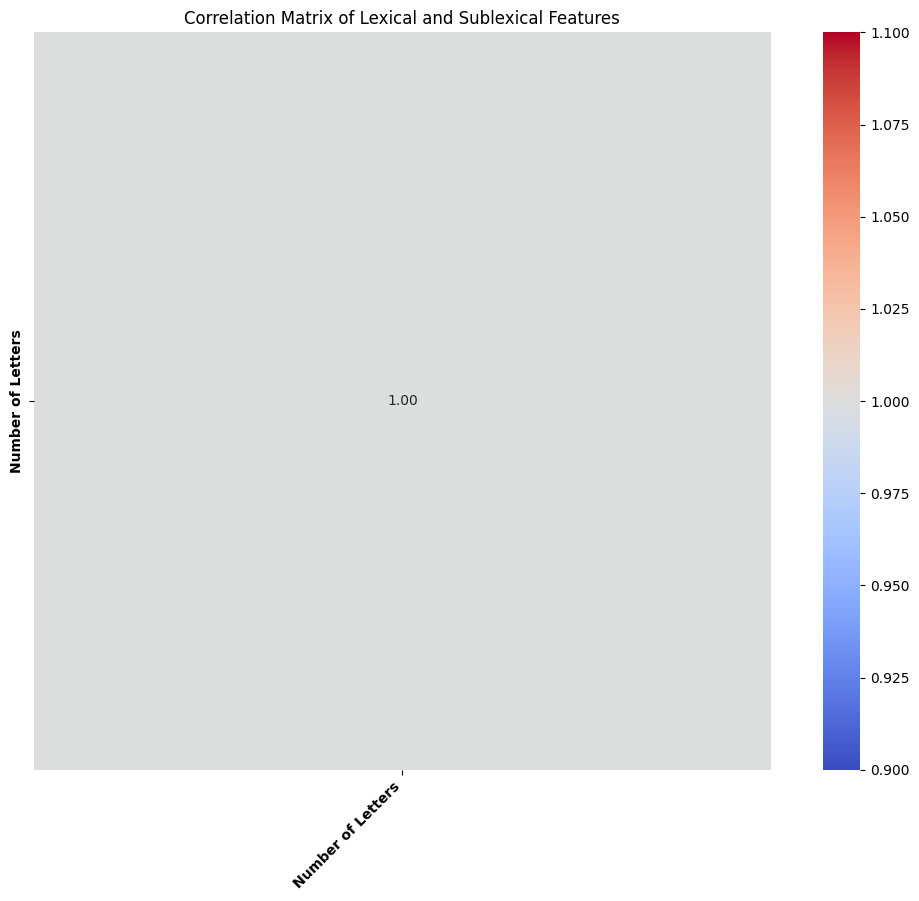

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Rename to include 'FREQcount' ---
bigram_rename = {
    'Log10(Maximum Bigram Frequency)': 'Log10(Maximum Bigram FREQcount)',
    'Log10(Mean Bigram Frequency)': 'Log10(Mean Bigram FREQcount)'
}
data_table = data_table.rename(columns={k: v for k, v in bigram_rename.items() if k in data_table.columns})

# Desired columns to include (from your list, now using renamed versions)
desired = [
    'Zipf Word Frequency',
    'Log10(Minimum Syllable FREQcount)',
    'Log10(Minimum Bigram FREQcount)',
    'Number of Letters',
    'Number of Syllables',
    'Log10(Maximum Syllable FREQcount)',
    'Log10(Mean Syllable FREQcount)',
    'Log10(Maximum Bigram FREQcount)',
    'Log10(Mean Bigram FREQcount)'
]

# Keep only columns that exist
desired = [c for c in desired if c in data_table.columns]

# Coerce to numeric
for c in desired:
    data_table[c] = pd.to_numeric(data_table[c], errors='coerce')

# Correlation
subset = data_table[desired]
corr_matrix = subset.corr(numeric_only=True)

# Plot
plt.figure(figsize=(11, 9))
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Bold the first 5
bold_labels = set(desired[:4])
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold' if tick.get_text() in bold_labels else 'normal')
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold' if tick.get_text() in bold_labels else 'normal')

plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix of Lexical and Sublexical Features')
plt.tight_layout()
plt.show()

"The matrix displays pairwise Pearson correlation coefficients among nine word-level parameters, including lexical frequency, sublexical frequency measures (bigram and syllable), and structural characteristics (letter and syllable counts). The color scale is centered at zero, such that red and blue indicate positive and negative correlations, respectively. Asterisks denote statistical significance of each correlation coefficient (p < .001: ***). Bolded axis labels indicate the five features that were ultimately selected as parametric modulators in the fMRI general linear models. Not shown above is spoken word duration in seconds, which was included as a parametric modulator in the auditory word frequency correlation contrast, but is not a constant lexical characteristic. While log-transformed maximum and mean frequencies for syllables and bigrams were initially considered (see Supplementary Methods), they were excluded due to lack of explanatory power."